In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
# Load the data
data = pd.read_csv('/Users/geraldzhao/Desktop/ML_final_proj/train.csv')
X = data.drop('Transported', axis=1)
y = data['Transported']

In [20]:
# Define categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

# Prepare data by applying preprocessing
X_processed = preprocessor.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [21]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# List to store results
results = []

In [22]:
# Iterate over each combination of parameters
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                    # Setup the Random Forest classifier
                    rf = RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        random_state=42
                    )
                    rf.fit(X_train, y_train)

                    # Predict on training and validation set
                    y_train_pred = rf.predict(X_train)
                    y_val_pred = rf.predict(X_val)

                    # Calculate metrics
                    train_accuracy = accuracy_score(y_train, y_train_pred)
                    val_accuracy = accuracy_score(y_val, y_val_pred)
                    precision = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
                    recall = recall_score(y_val, y_val_pred, average='macro', zero_division=0)

                    # Store results
                    results.append({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features,
                        'Training Accuracy': train_accuracy,
                        'Validation Accuracy': val_accuracy,
                        'Precision': precision,
                        'Recall': recall
                    })

In [27]:
# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
results_df.to_csv('rand_forest_result_table.csv', index=False)
results_df

,n_estimators,max_depth,min_samples_split,min_samples_leaf,max_features,Training Accuracy,Validation Accuracy,Precision,Recall
0,100,10.0,2,1,sqrt,0.738712,0.740656,0.744631,0.741255
1,100,10.0,2,1,log2,0.746045,0.729155,0.730289,0.729472
2,100,10.0,2,2,sqrt,0.740581,0.744681,0.747681,0.745196
3,100,10.0,2,2,log2,0.504745,0.505463,0.752589,0.500581
4,100,10.0,5,1,sqrt,0.740006,0.741231,0.745437,0.741847
5,100,10.0,5,1,log2,0.746045,0.729155,0.730289,0.729472
6,100,10.0,5,2,sqrt,0.740437,0.744681,0.747681,0.745196
7,100,10.0,5,2,log2,0.504458,0.505463,0.752589,0.500581
8,100,20.0,2,1,sqrt,0.740581,0.741806,0.745946,0.742416
9,100,20.0,2,1,log2,0.774231,0.728580,0.729828,0.728914


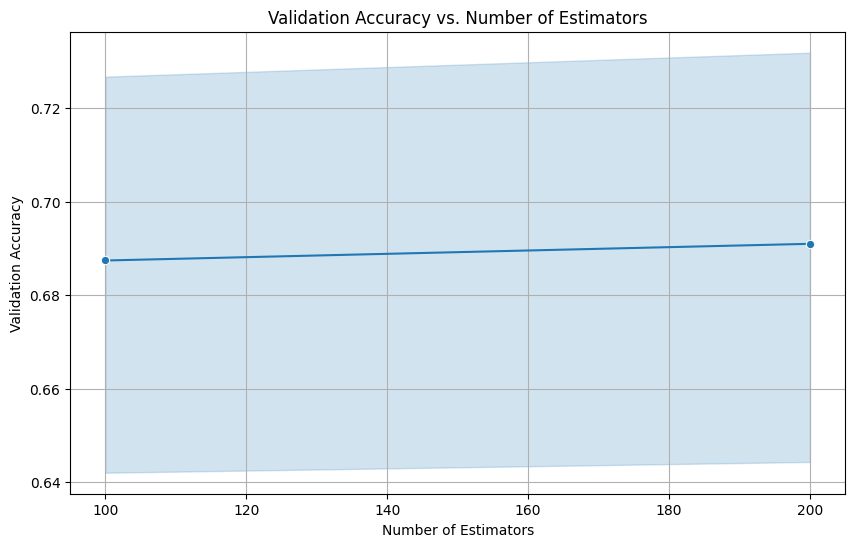

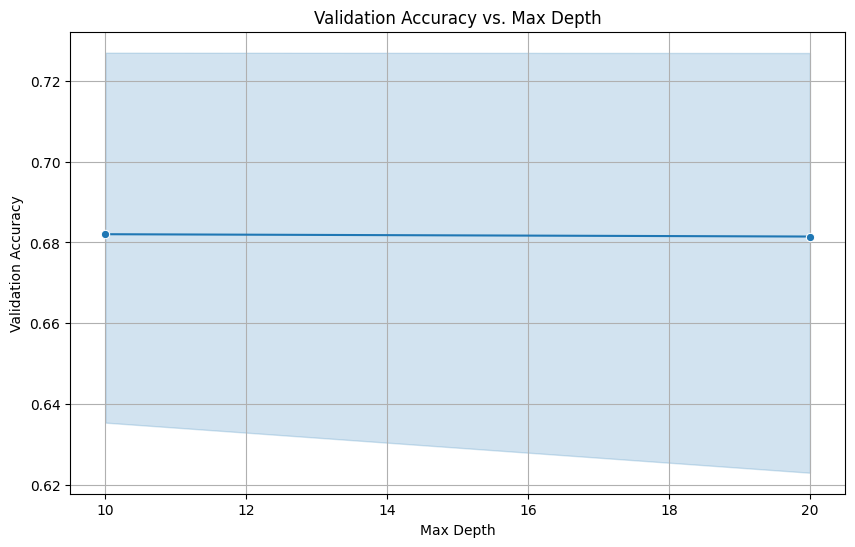

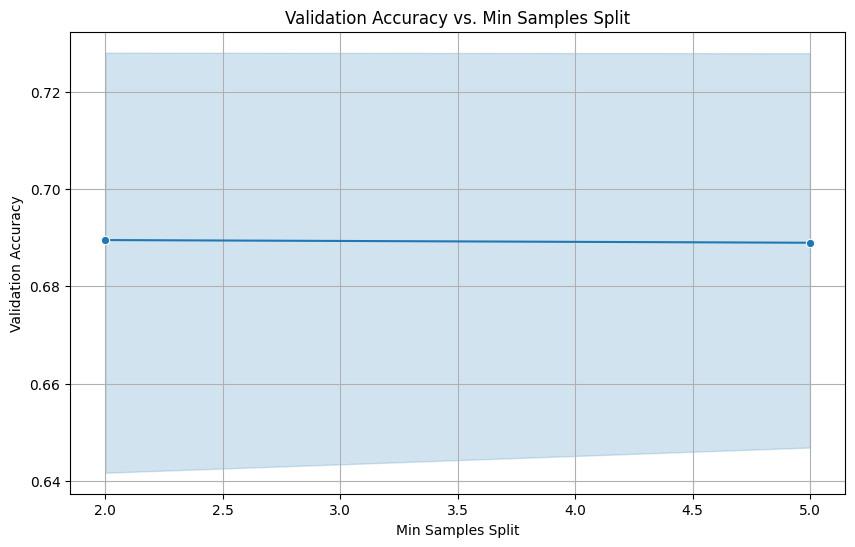

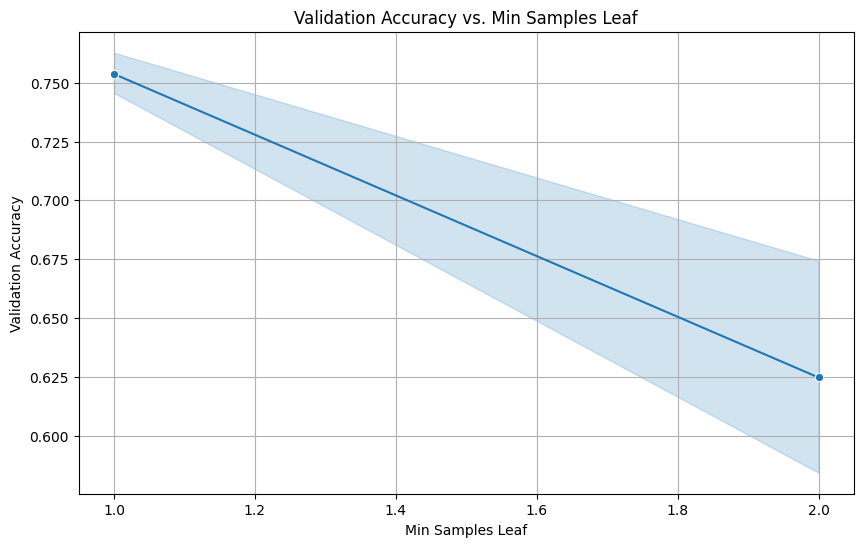

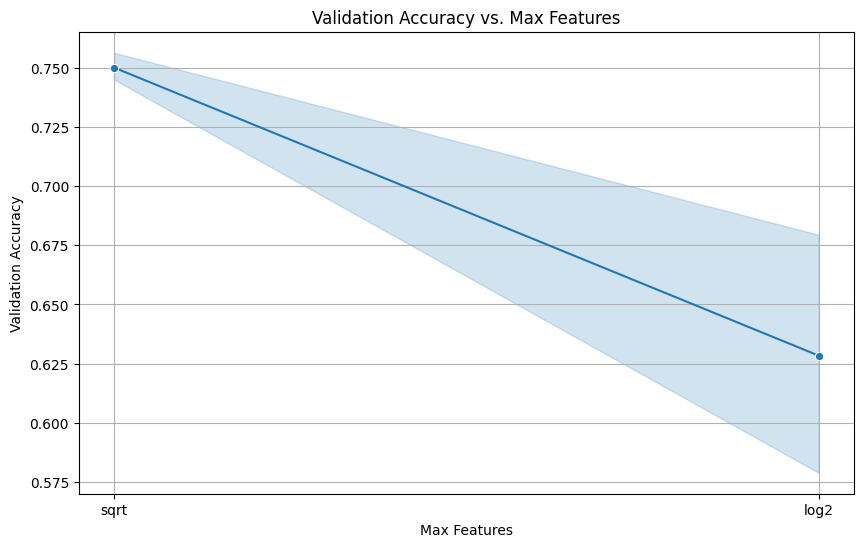

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Accuracy vs. n_estimators
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='n_estimators', y='Validation Accuracy', marker='o')
plt.title('Validation Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Plotting Accuracy vs. max_depth
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='max_depth', y='Validation Accuracy', marker='o')
plt.title('Validation Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Plotting Accuracy vs. min_samples_split
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='min_samples_split', y='Validation Accuracy', marker='o')
plt.title('Validation Accuracy vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Plotting Accuracy vs. min_samples_leaf
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='min_samples_leaf', y='Validation Accuracy', marker='o')
plt.title('Validation Accuracy vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Plotting Accuracy vs. max_features
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='max_features', y='Validation Accuracy', marker='o')
plt.title('Validation Accuracy vs. Max Features')
plt.xlabel('Max Features')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()
